<a href="https://colab.research.google.com/github/kohys-dev/RedWineQuality/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
sns.set(style="whitegrid")
color = sns.color_palette("pastel")
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
df_origin = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/RedWine/winequality-red.csv', sep=';')
df_origin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 데이터 확인

In [ ]:
print("Red_Wine_Dataset's shape : {}".format(df_origin.shape))
print()
print("Red_Wine_Dataset's info : {}".format(df_origin.info()))

Red_Wine_Dataset's shape : (1599, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Red_Wine_Dataset's info : None


In [ ]:
df_origin.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df_origin.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 데이터 분포 확인

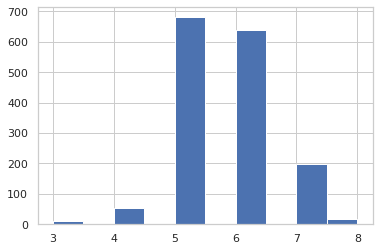

In [ ]:
df_origin['quality'].hist()
plt.show()

# 클래스 불균형 데이터

In [ ]:
def draw_plot(df, plot):
    col_in_row = 3
    if len(df.columns) % col_in_row == 0:
        rows = len(df.columns)//col_in_row-1
    rows = len(df.columns)//col_in_row

    fig, ax1 = plt.subplots(rows, col_in_row, figsize=(col_in_row*6,rows*4))
    k = 0
    palette = 'pastel'
    columns = list(df.columns)
    for i in range(rows):
        for j in range(col_in_row):
            try:
                if plot == 'distplot':
                    sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'blue', kde=True )
                elif plot == 'scatterplot':
                    sns.scatterplot(df['quality'], df[columns[k]], ax = ax1[i][j], palette=palette)
                elif plot == 'boxplot':
                    sns.boxplot(df['quality'], df[columns[k]], ax = ax1[i][j], palette=palette)
                elif plot == 'violinplot':
                    sns.violinplot(df['quality'], df[columns[k]], ax = ax1[i][j], palette=palette)
                k += 1       
            except:
                break


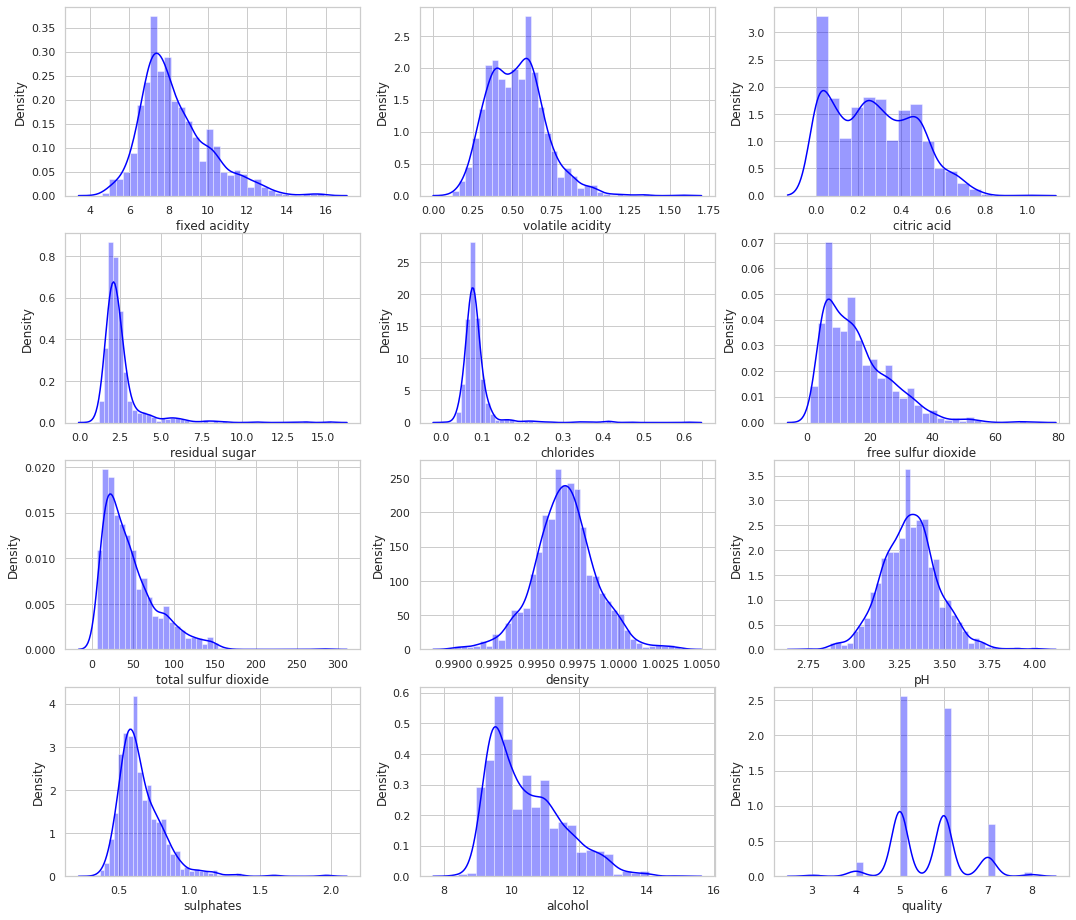

In [ ]:
draw_plot(df_origin, 'distplot')

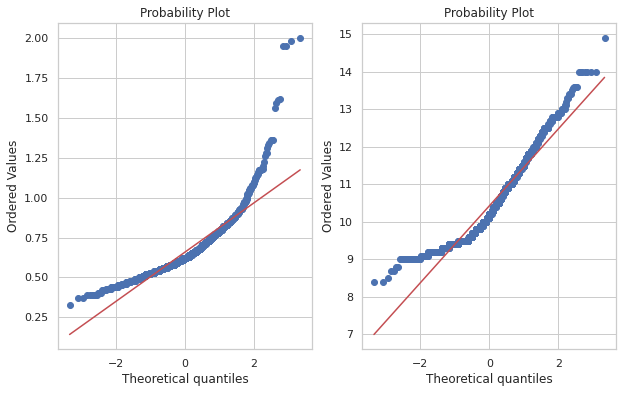

In [ ]:
from scipy import stats

fig = plt.figure(figsize = (10,6))

fig.add_subplot(1,2,1)
res = stats.probplot(df_origin['sulphates'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df_origin['alcohol'], plot=plt)

In [ ]:
def get_skew_kurt_score(df):
    for item in df.columns:    
        print('{:30}'.format(item), "Skewness: {:.3f}".format(df[item].skew()), "Kurtosis: {:.3f}".format(df[item].kurt()))

In [ ]:
get_skew_kurt_score(df_origin)

fixed acidity                  Skewness: 0.983 Kurtosis: 1.132
volatile acidity               Skewness: 0.672 Kurtosis: 1.226
citric acid                    Skewness: 0.318 Kurtosis: -0.789
residual sugar                 Skewness: 4.541 Kurtosis: 28.618
chlorides                      Skewness: 5.680 Kurtosis: 41.716
free sulfur dioxide            Skewness: 1.251 Kurtosis: 2.024
total sulfur dioxide           Skewness: 1.516 Kurtosis: 3.810
density                        Skewness: 0.071 Kurtosis: 0.934
pH                             Skewness: 0.194 Kurtosis: 0.807
sulphates                      Skewness: 2.429 Kurtosis: 11.720
alcohol                        Skewness: 0.861 Kurtosis: 0.200
quality                        Skewness: 0.218 Kurtosis: 0.297


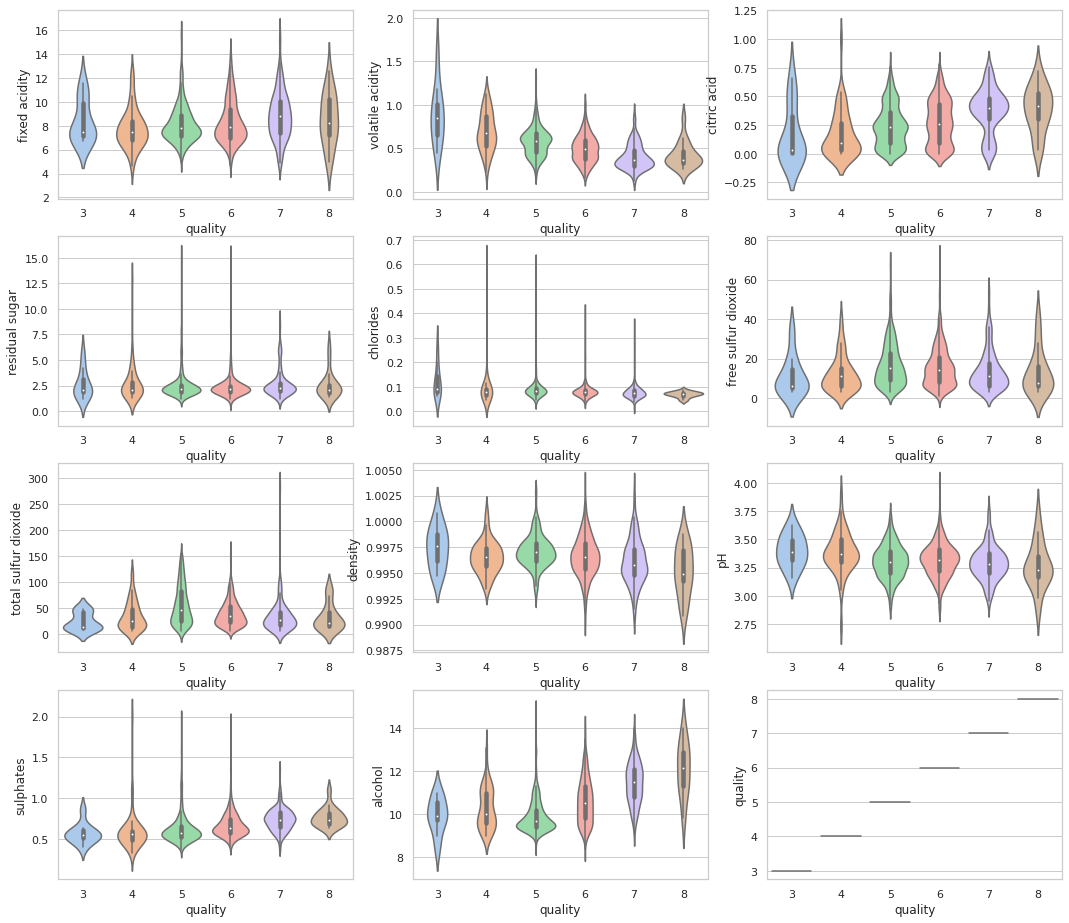

In [ ]:
draw_plot(df_origin, 'violinplot')

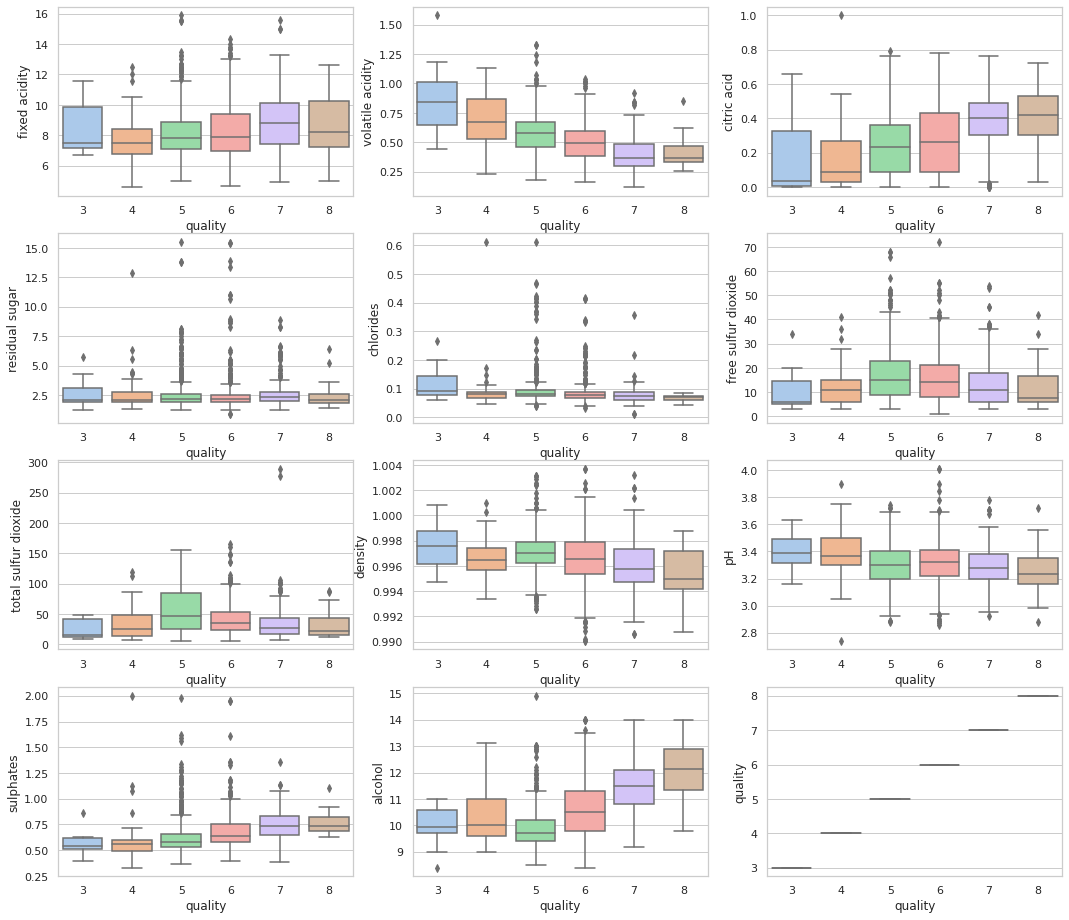

In [ ]:
draw_plot(df_origin, 'boxplot')

## 데이터 상관관계 확인

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


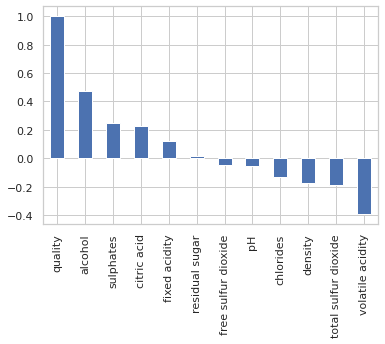

In [ ]:
corr = df_origin.corr()['quality'].sort_values(ascending=False)
corr.plot(kind='bar')
print(corr)

In [ ]:
corr[abs(corr) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric acid         0.226373
volatile acidity   -0.390558
Name: quality, dtype: float64

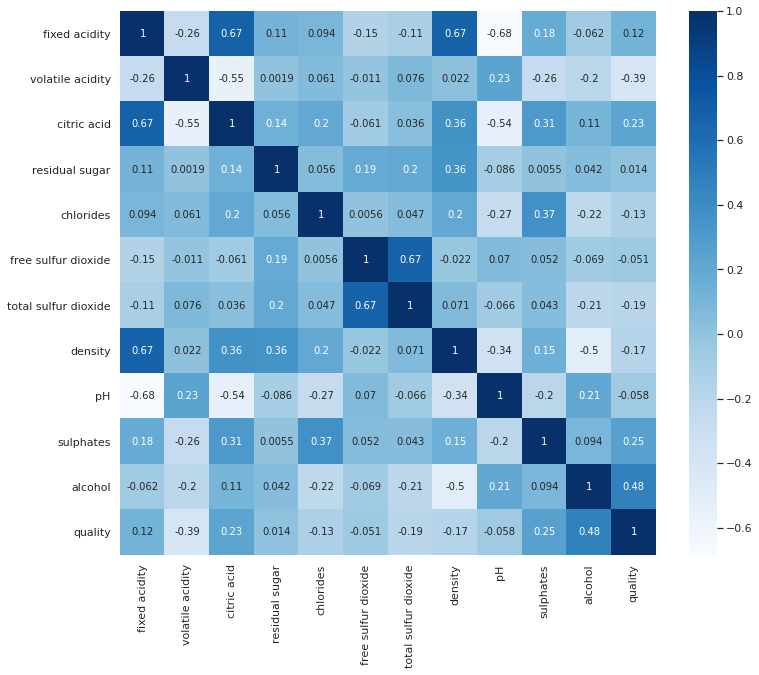

In [ ]:
df_corr_pearson = df_origin.corr(method ='pearson')
plt.figure(figsize = (12,10))
sns.heatmap(df_corr_pearson, annot=True, cmap='Blues')

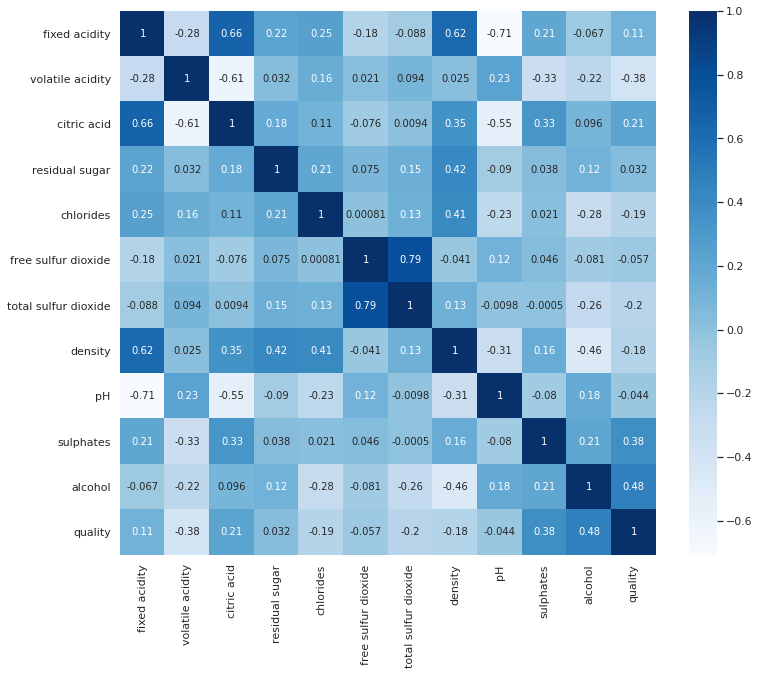

In [ ]:
df_corr_spearman = df_origin.corr(method ='spearman')
plt.figure(figsize = (12,10))
sns.heatmap(df_corr_spearman, annot=True, cmap='Blues')

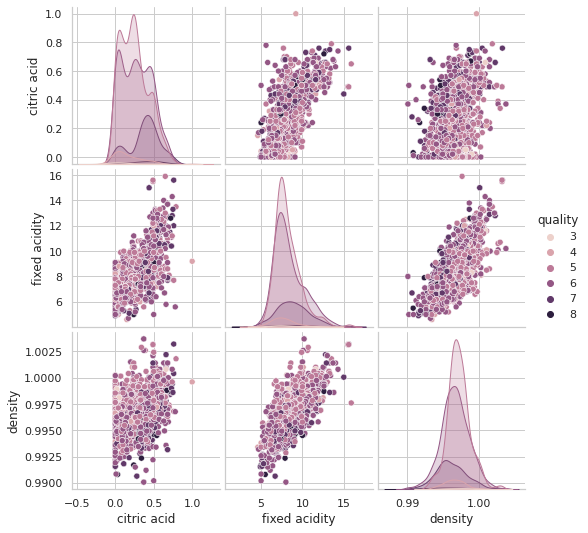

In [ ]:
sns.pairplot(df_origin, vars=['citric acid', 'fixed acidity', 'density'], hue='quality')

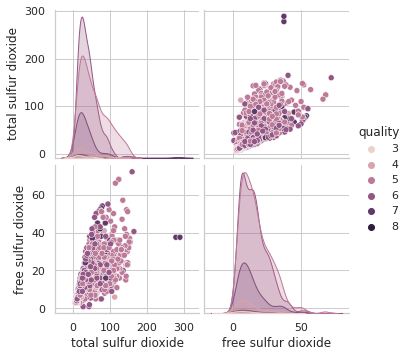

In [ ]:
sns.pairplot(df_origin, vars=['total sulfur dioxide', 'free sulfur dioxide'], hue='quality')

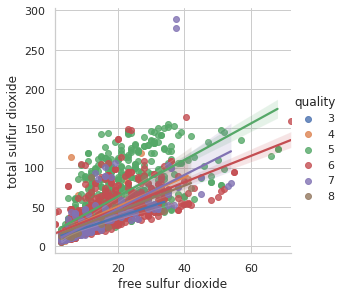

In [ ]:
sns.lmplot(x='free sulfur dioxide', y = 'total sulfur dioxide', hue='quality', data=df_origin, size=4)

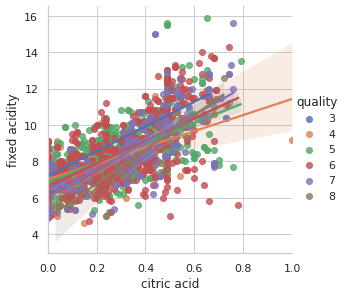

In [ ]:
sns.lmplot(x='citric acid', y = 'fixed acidity', hue='quality', data=df_origin, size=4)

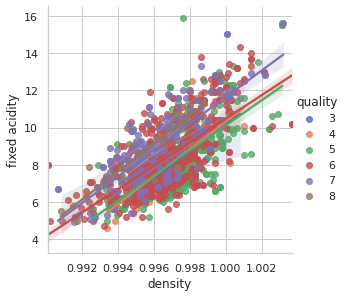

In [ ]:
sns.lmplot(x='density', y = 'fixed acidity', hue='quality', data=df_origin, size=4)

## 이상치 탐색

In [ ]:
df_copy = df_origin.copy()
df_copy['alcohol'] = round(df_copy['alcohol'])
# df_copy['volatile acidity'] = round(df_copy['volatile acidity'])

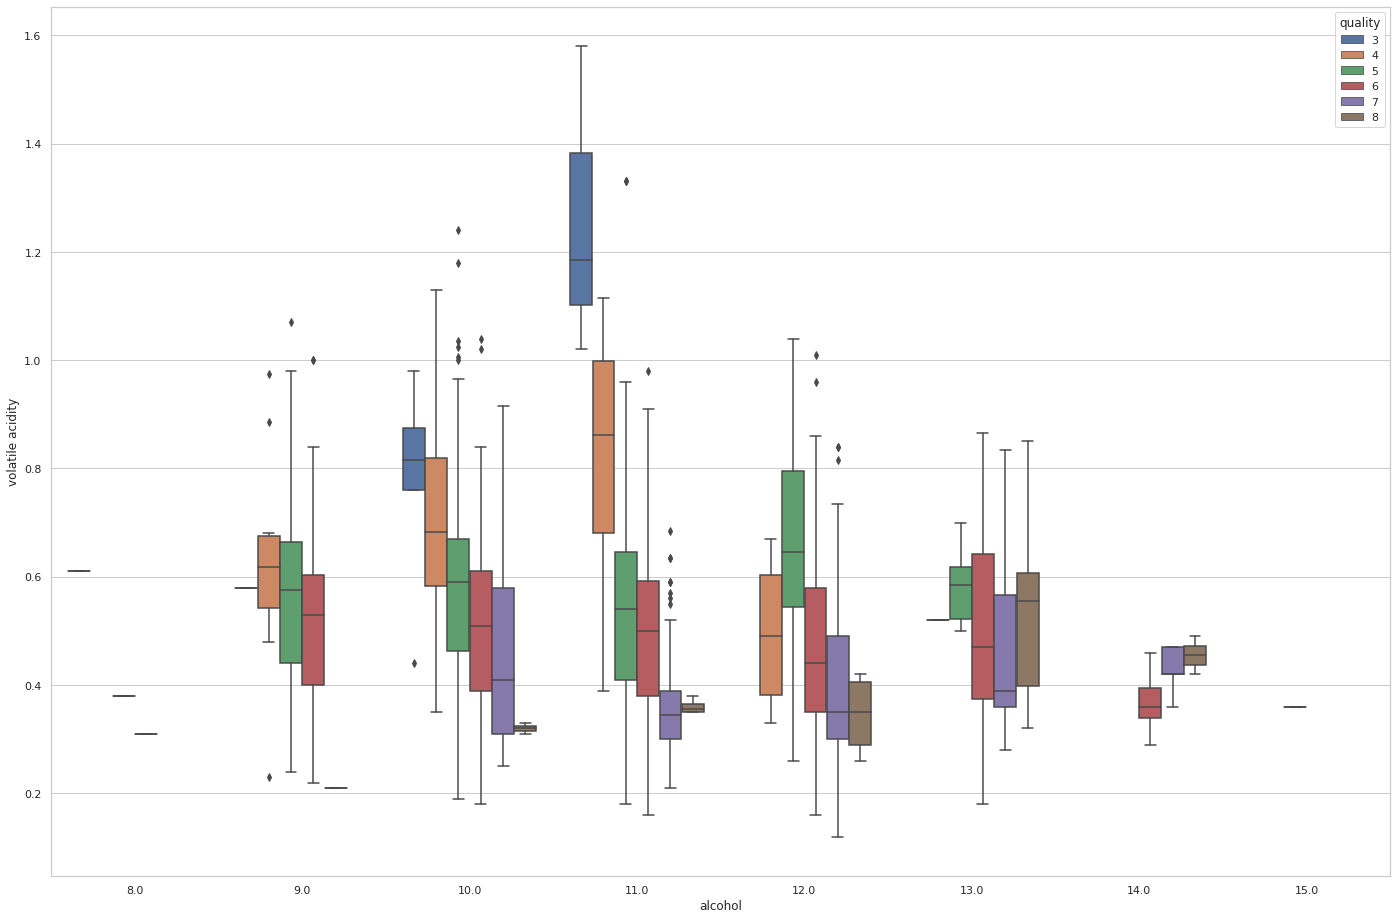

In [ ]:
plt.figure(figsize=(24, 16))
sns.boxplot(x='alcohol', y='volatile acidity', hue='quality', data=df_copy)
plt.show()

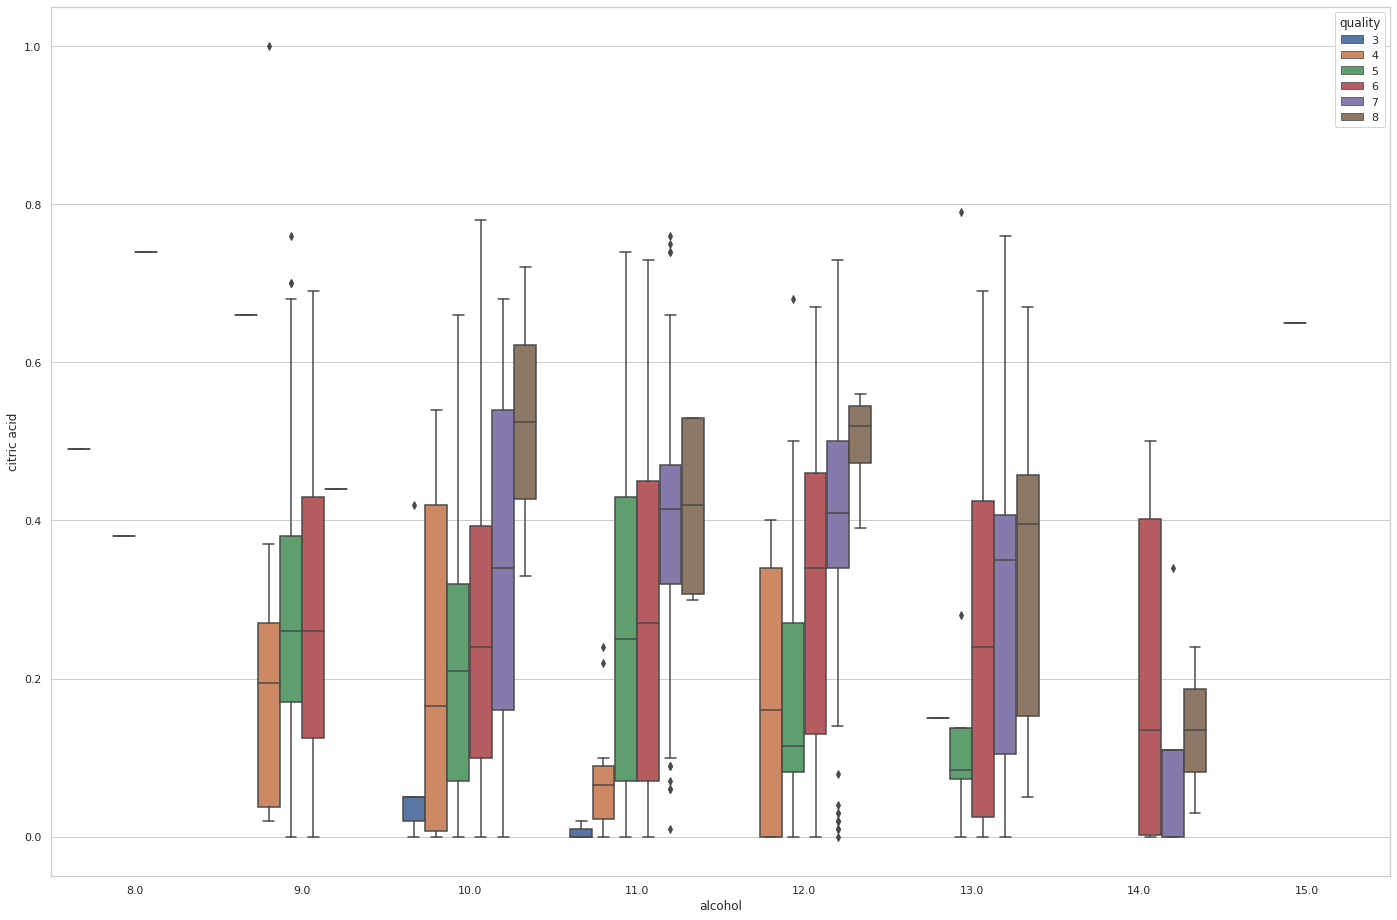

In [ ]:
plt.figure(figsize=(24, 16))
sns.boxplot(x='alcohol', y='citric acid', hue='quality', data=df_copy)
plt.show()

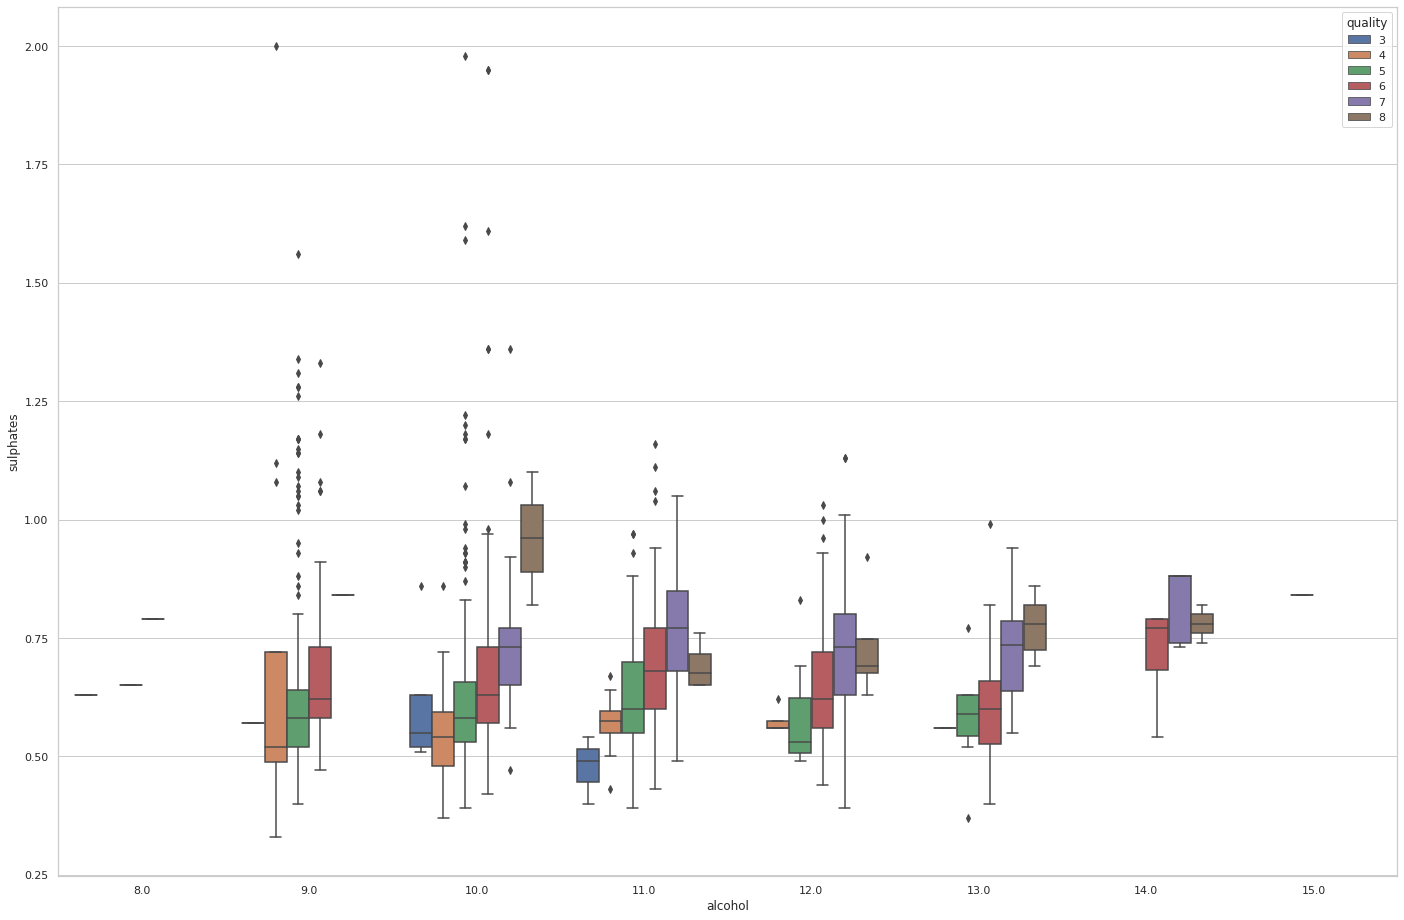

In [ ]:
plt.figure(figsize=(24, 16))
sns.boxplot(x='alcohol', y='sulphates', hue='quality', data=df_copy)
plt.show()

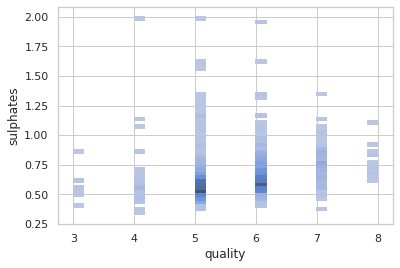

In [ ]:
sns.histplot(x='quality', y='sulphates', data=df_origin)

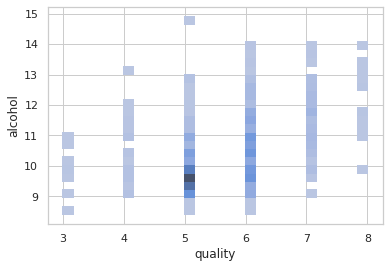

In [ ]:
sns.histplot(x='quality', y='alcohol', data=df_origin)

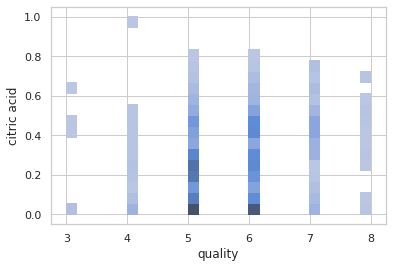

In [ ]:
sns.histplot(x='quality', y='citric acid', data=df_origin)
plt.show()

In [ ]:
df_origin.sulphates[df_origin.sulphates > 1.75].count()

4

In [ ]:
df_origin['citric acid'][df_origin['citric acid'] > 0.85].count()

1

In [ ]:
df_origin['volatile acidity'][df_origin['volatile acidity'] > 1.4].count()

1

In [ ]:
df_origin['alcohol'][df_origin['alcohol'] > 14.0].count()

1